In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

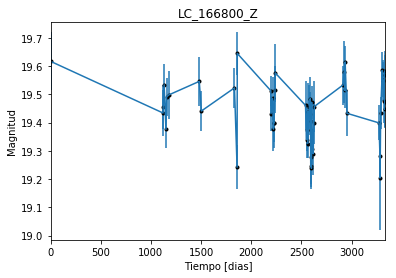

In [2]:
data = np.genfromtxt('LC_166800_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_166800_Z')
plt.savefig("LC_166800_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

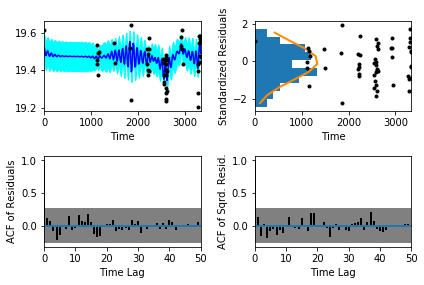

In [5]:
sample.assess_fit()

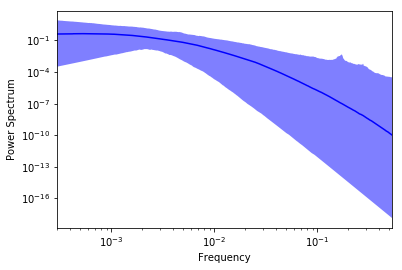

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

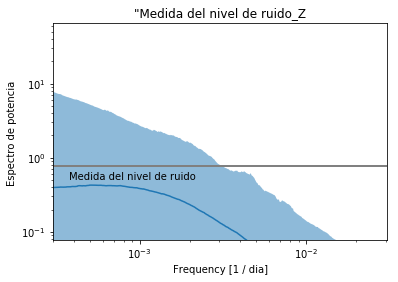

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_166800_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_166800_Z')

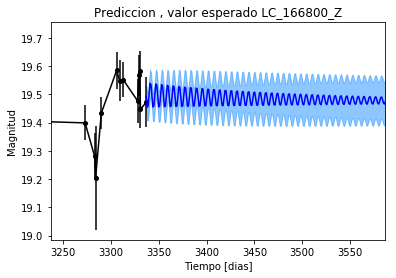

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_166800_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_166800_Z')

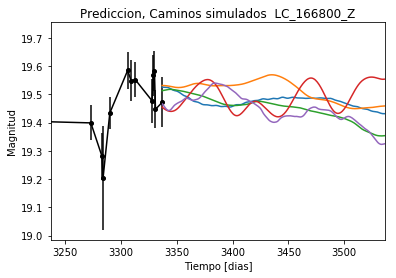

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_166800_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


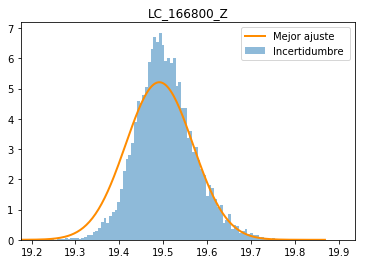

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_166800_Z')
plt.savefig("Mejor_ajuste_LC_166800_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_166800_Z')

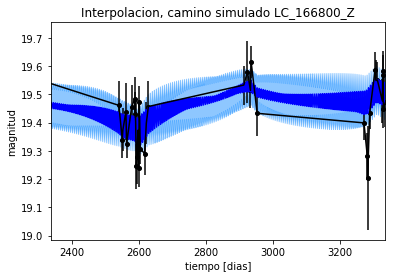

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_166800_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_166800_Z')

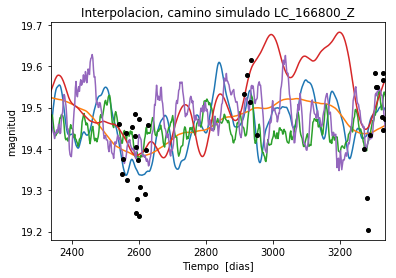

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_166800_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 969.421112416
Median: 0.00707965370671
Standard deviation: 0.18089467807
68% credibility interval: [ 0.0007896   0.13342459]
95% credibility interval: [  3.63440134e-04   7.24992595e-01]
99% credibility interval: [  3.15885156e-04   9.79873479e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 617.696819157
Median: 0.00337267572299
Standard deviation: 0.0891897012064
68% credibility interval: [ 0.00064588  0.03710566]
95% credibility interval: [ 0.00033865  0.29046661]
99% credibility interval: [  3.06892523e-04   6.85741708e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 454.042496401
Median: 0.0343601742545
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2037.4270451
Median: 74.8451184065
Standard deviation: 1.65714167024
68% credibility interval: [ 73.07908793  76.07781635]
95% credibility interval: [ 70.5311526   76.91284792]
99% credibility interval: [ 68.53867827  77.92071649]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 400.945518045
Median: 0.820644770141
Standard deviation: 2.319308739
68% credibility interval: [ 0.06121519  4.0026629 ]
95% credibility interval: [ 0.01489022  8.04511955]
99% credibility interval: [  1.01679132e-02   1.18034724e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1099.71382921
Median: 0.826102261372
Standard deviation: 10.2344821428
68% credibility interval: [  0.02847109  10.04984975]
95% credibility interval: [  1.6

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20016.4490286
Median: 5.13334497376e-18
Standard deviation: 3.6461003095e+107
68% credibility interval: [  1.16219844e-46   9.39375295e+05]
95% credibility interval: [  5.29790502e-114   1.22083729e+068]
99% credibility interval: [  3.16919604e-129   1.06783346e+089]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2845.43093265
Median: 19.4648722256
Standard deviation: 0.0312941341001
68% credibility interval: [ 19.44072505  19.49350951]
95% credibility interval: [ 19.41310213  19.53845236]
99% credibility interval: [ 19.38512958  19.58492704]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 514.727382557
Median: 0.0385546597937
Standard deviation: 0.24998277115
68% credibility interval: [ 0.          0.40117164]
95% credibility interval: [ 0.          0.89646466]
99% credibility interval: [ 0.          1.02023084]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 514.727382557
Median: 0.0385546597937
Standard deviation: 0.24998277115
68% credibility interval: [ 0.          0.40117164]
95% credibility interval: [ 0.          0.89646466]
99% credibility interval: [ 0.          1.02023084]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2645.82338349
Median: 0.0
Standard deviation: 0.0161113207665
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2037.4270451
Median: 74.8451184065
Standard deviation: 1.65714167024
68% credibility interval: [ 73.07908793  76.07781635]
95% credibility interval: [ 70.5311526   76.91284792]
99% credibility interval: [ 68.53867827  77.92071649]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 4034.25665852
Median: 0.00410351101571
Standard deviation: 0.00544482232925
68% credibility interval: [ 0.00216902  0.00813419]
95% credibility interval: [ 0.00108229  0.01772486]
99% credibility interval: [ 0.00062884  0.03103244]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2524.82785544
Median: 1.14121133635
Standard deviation: 0.187629424793
68% credibility interval: [ 0.97822296  1.34291624]
95% credibility interval: [ 0.83570982  1.57117383]
99% credibility interval: [ 0.75435785  1.74287998]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 407.222112873
Median: 0.000168008909129
Standard deviation: 0.355652225366
68% credibility interval: [  2.38941687e-09   2.11384932e-02]
95% credibility interval: [  2.14545080e-72   5.74977999e-01]
99% credibility interval: [  1.80232224e-91   2.37315238e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 969.421112416
Median: (-0.0444827761499-0.446367576553j)
Standard deviation: 1.93879053272
68% credibility interval: [-0.83833142-2.28335703j -0.00496118-0.03949932j]
95% credibility interval: [ -4.55526282e+00-5.47376368j  -2.28356171e-03-6.51859852j]
99% credibility interval: [ -6.15672664e+00+0.j         -1.98476497e-03-0.0780354j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 617.696819157
Median: (-0.0211911465486+0.00348123241436j)
Standard deviation: 1.6676642513
68% credibility interval: [-0.23314171+0.91892638j -0.00405817+0.67399192j]
95% credibility interval: [-1.82505551+1.19780193j -0.00212777+0.j        ]
99% credibility interval: [ -4.30864222e+00+5.37849236j  -1.92826259e-03+0.j        ]
Posterior sum